In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
roi = cv2.imread('data/IMG_20191019_142201.jpg') 

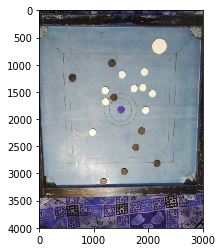

In [22]:
plt.imshow(roi,cmap='gray')

In [23]:
cv2.imshow('image', roi) 

In [24]:
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

In [28]:
gray.shape

(4000, 3000)

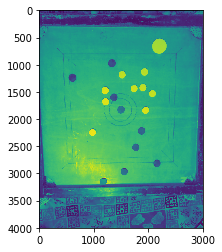

In [26]:
plt.imshow(gray)

In [33]:
img = gray
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

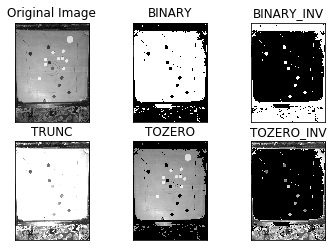

In [35]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [12]:
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY_INV, 11, 1)

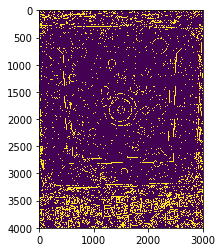

In [27]:
plt.imshow(thresh)

In [13]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)


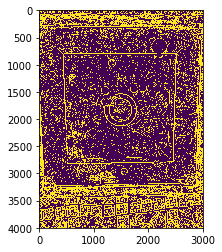

In [29]:
plt.imshow(closing)

In [16]:
cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)

In [17]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(roi, ellipse, (0,255,0), 2)

In [18]:
cv2.imshow('final result', roi)

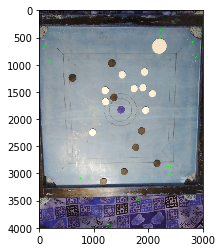

In [19]:
plt.imshow(roi)